<a href="https://colab.research.google.com/github/MehrdadJalali-AI/SOCIAL-OPTIMIZATION/blob/main/Plot_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing 21 Benchmark Functions in 2D and 3D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
A = np.array([[3.0, 10, 30],
              [0.1, 10, 35],
              [3.0, 10, 30],
              [0.1, 10, 35]])
P = 1e-4 * np.array([[3689, 1170, 2673],
                     [4699, 4387, 7470],
                     [1091, 8732, 5547],
                     [381, 5743, 8828]])

# Dictionary: name -> (function, bounds, '2D' or '3D')
FUNCTIONS = {
    'Sphere': (lambda x: np.sum(x**2), [-5, 5], '3D'),
    'Schwefel_2_22': (lambda x: np.sum(np.abs(x)) + np.prod(np.abs(x)), [-5, 5], '3D'),
    'Schwefel_1_2': (lambda x: np.sum([np.sum(x[:i+1])**2 for i in range(len(x))]), [-5, 5], '3D'),
    'Schwefel_2_21': (lambda x: np.max(np.abs(x)), [-5, 5], '3D'),
    'Rosenbrock': (lambda x: 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2, [-2, 2], '3D'),
    'Step': (lambda x: np.sum(np.floor(x + 0.5)**2), [-5, 5], '3D'),
    'Quartic': (lambda x: sum([(i+1)*xi**4 for i, xi in enumerate(x)]), [-1.28, 1.28], '3D'),
    'Schwefel_2_26': (lambda x: 418.9829*len(x) - np.sum(x * np.sin(np.sqrt(np.abs(x)))), [-500, 500], '3D'),
    'Rastrigin': (lambda x: 10*len(x) + np.sum(x**2 - 10*np.cos(2*np.pi*x)), [-5.12, 5.12], '3D'),
    'Ackley': (lambda x: -20*np.exp(-0.2*np.sqrt(np.mean(x**2))) - np.exp(np.mean(np.cos(2*np.pi*x))) + 20 + np.e, [-5, 5], '3D'),
    'Griewank': (lambda x: np.sum(x**2)/4000 - np.prod(np.cos(x / np.sqrt(np.arange(1, len(x)+1)))) + 1, [-600, 600], '3D'),
    'Penalized': (lambda x: (np.pi/len(x))*(10*np.sin(np.pi*(1+(x[0]+1)/4))**2 +
                          ((1+(x[0]+1)/4)-1)**2 * (1+10*np.sin(np.pi*(1+(x[1]+1)/4))**2)) +
                          ((1+(x[1]+1)/4)-1)**2, [-5, 5], '3D'),
    'Penalized2': (lambda x: 0.1*(np.sin(3*np.pi*x[0])**2 +
                    (x[0]-1)**2 * (1+np.sin(3*np.pi*x[1])**2) +
                    (x[1]-1)**2 * (1+np.sin(2*np.pi*x[1])**2)), [-5, 5], '3D'),
    'Foxholes': (lambda x: 1.0 / (1/500.0 + sum([1.0 / (j+1 + (x[0] - 4.0)**6 + (x[1] - y)**6)
                                                 for j, y in enumerate(np.linspace(0, 12, 25))])), [-5, 5], '3D'),
    'Kowalik': (lambda x: sum([(0.1957 - (x[0]*(b**2 + b*x[1]) / (b**2 + b*x[2] + x[3]*x[2])))**2
                               for b in [4, 2, 1, 0.5]]), [-5, 5], '3D'),
    'Camel-Back': (lambda x: 4*x[0]**2 - 2.1*x[0]**4 + (1/3)*x[0]**6 + x[0]*x[1] - 4*x[1]**2 + 4*x[1]**4, [-2, 2], '2D'),
    'Branin': (lambda x: (x[1] - (5.1/(4*np.pi**2))*x[0]**2 + (5/np.pi)*x[0] - 6)**2 +
               10*(1 - 1/(8*np.pi))*np.cos(x[0]) + 10, [-5, 5], '2D'),
    'Goldstein-Price': (lambda x: (1 + (x[0]+x[1]+1)**2*(19 - 14*x[0] + 3*x[0]**2 - 14*x[1] +
                                                         6*x[0]*x[1] + 3*x[1]**2)) *
                        (30 + (2*x[0]-3*x[1])**2*(18 - 32*x[0] + 12*x[0]**2 + 48*x[1] -
                                                 36*x[0]*x[1] + 27*x[1]**2)), [-2, 2], '2D'),
    'Hartman': (lambda x: -sum([a * np.exp(-np.sum(A[i]*(x - P[i])**2))
                    for i, a in enumerate([1.0, 1.2, 3.0, 3.2])]), [-1, 1], '3D'),
    'Shekel1': (lambda x: -sum([1.0 / (np.sum((x - np.array([4, 1, 8, 6]))**2) + 0.1)
                    for _ in range(4)]), [0, 10], '3D')
}


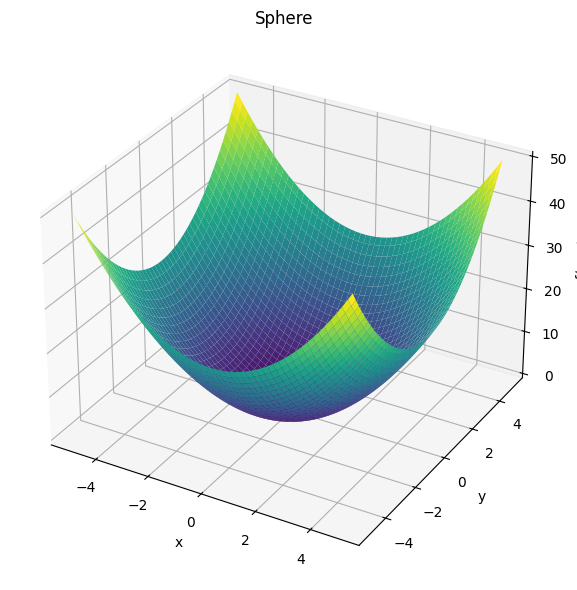

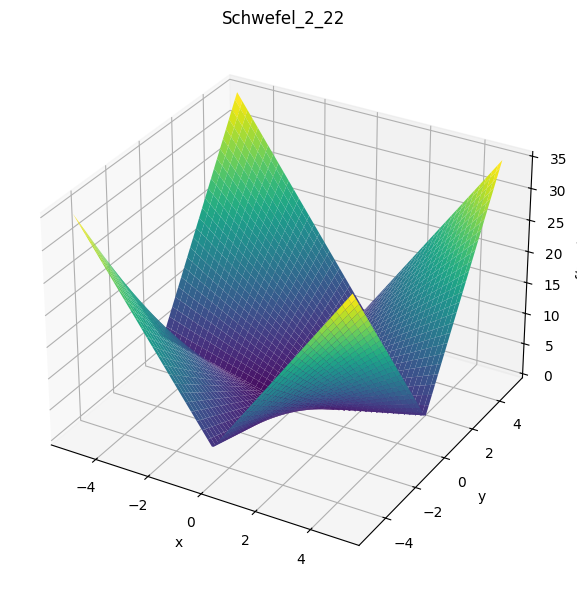

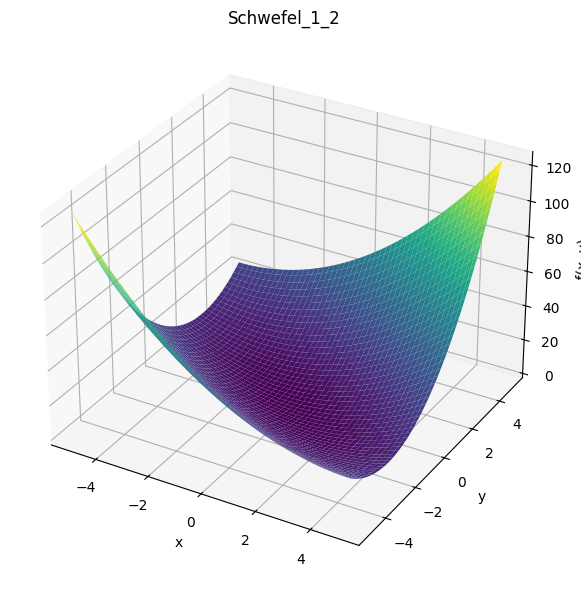

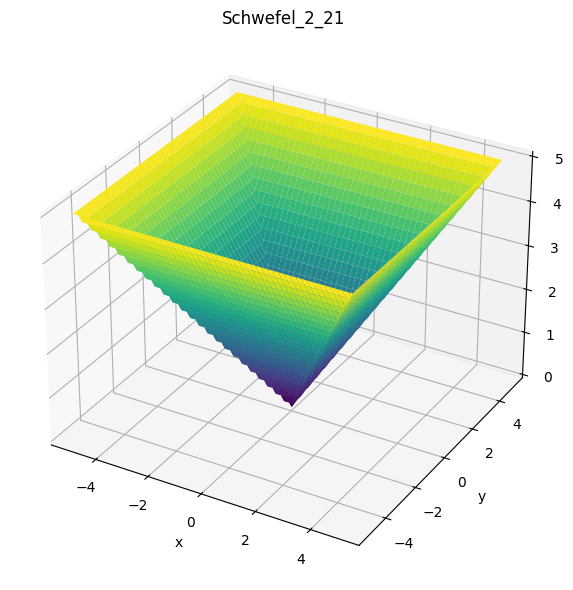

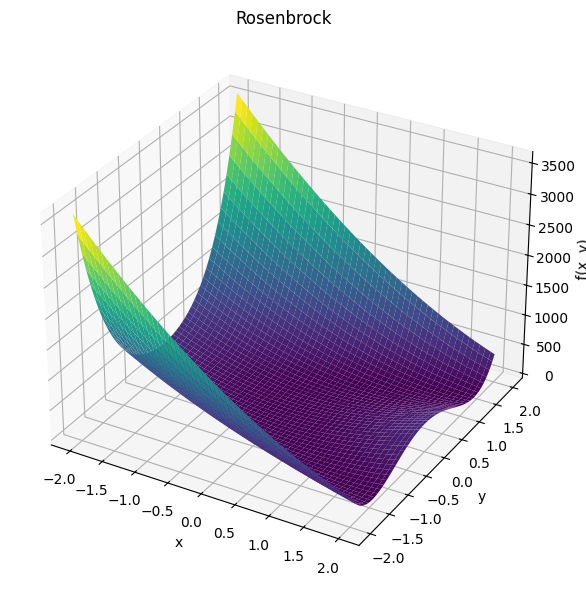

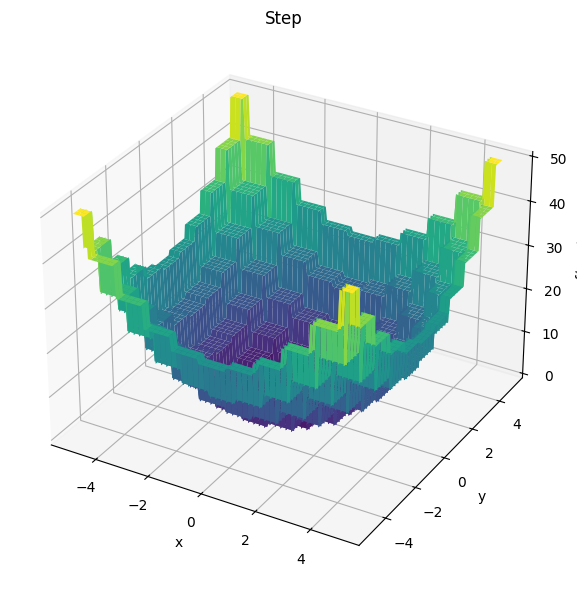

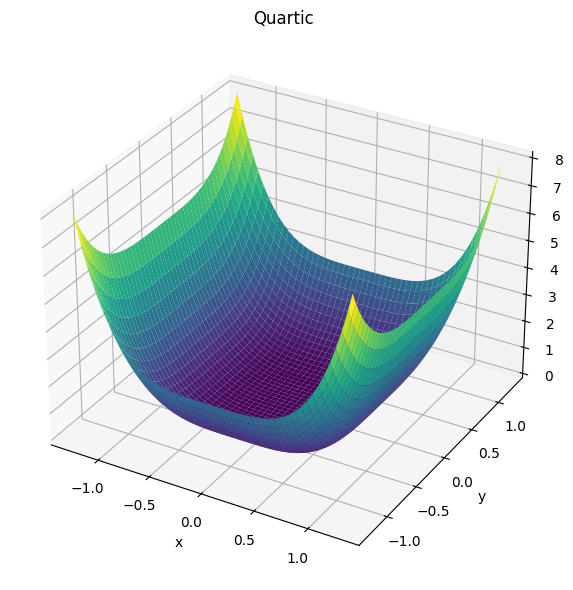

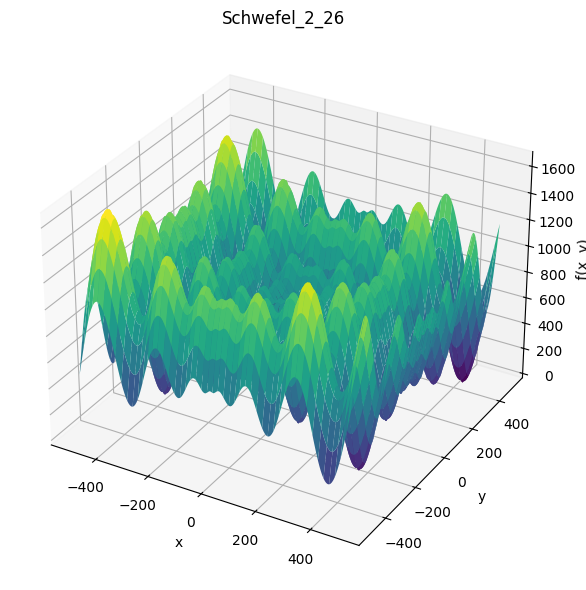

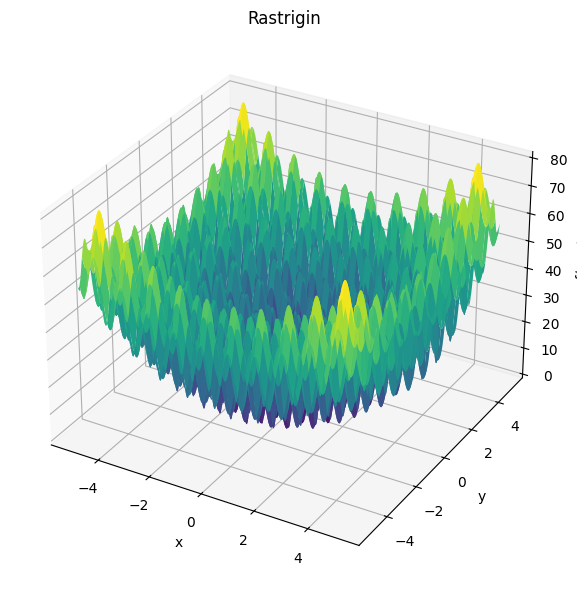

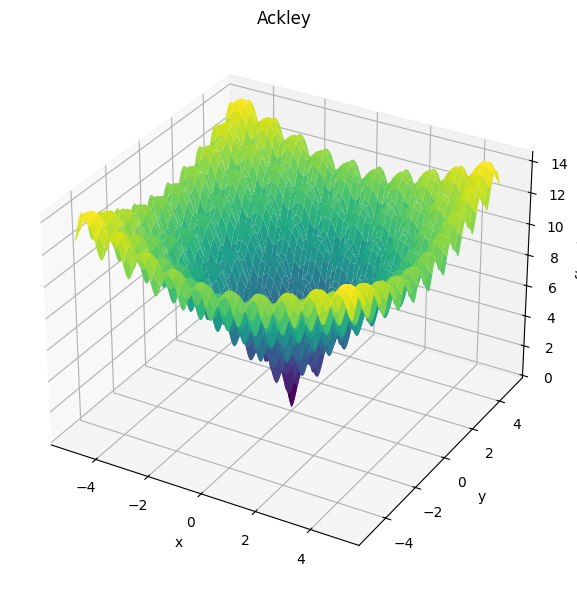

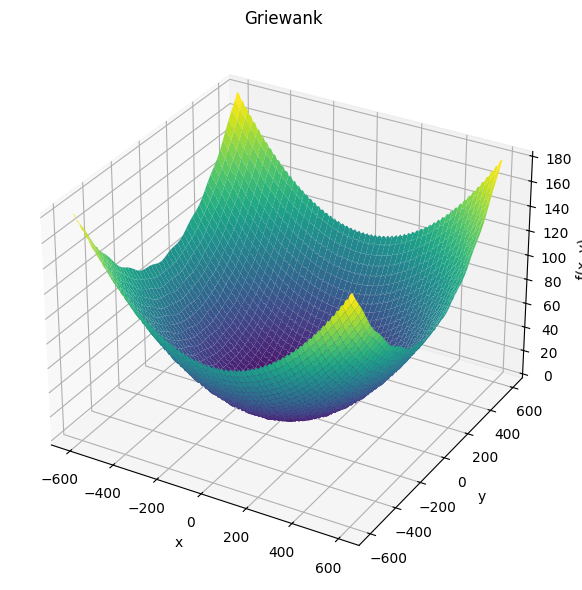

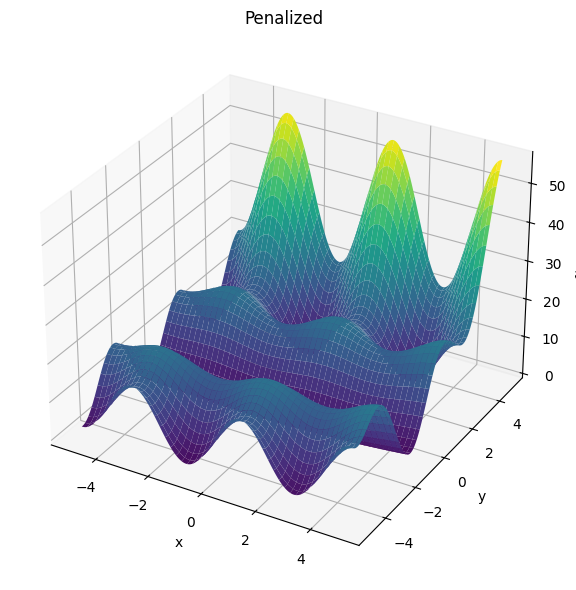

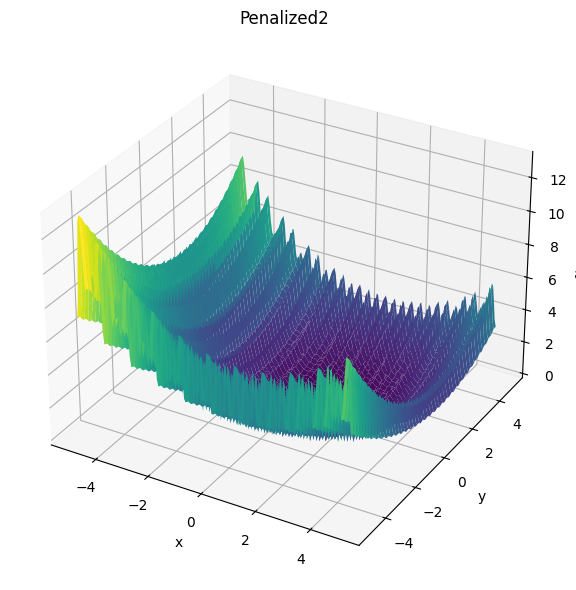

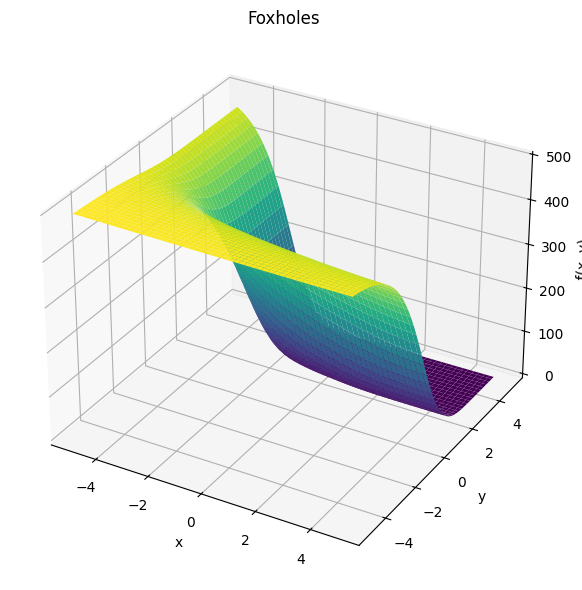

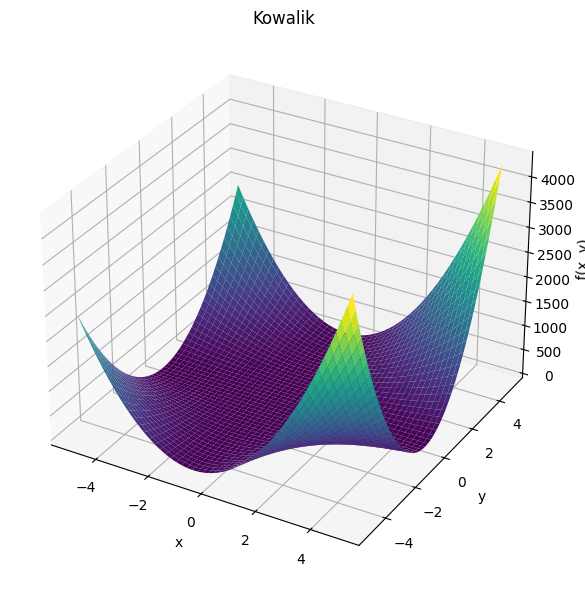

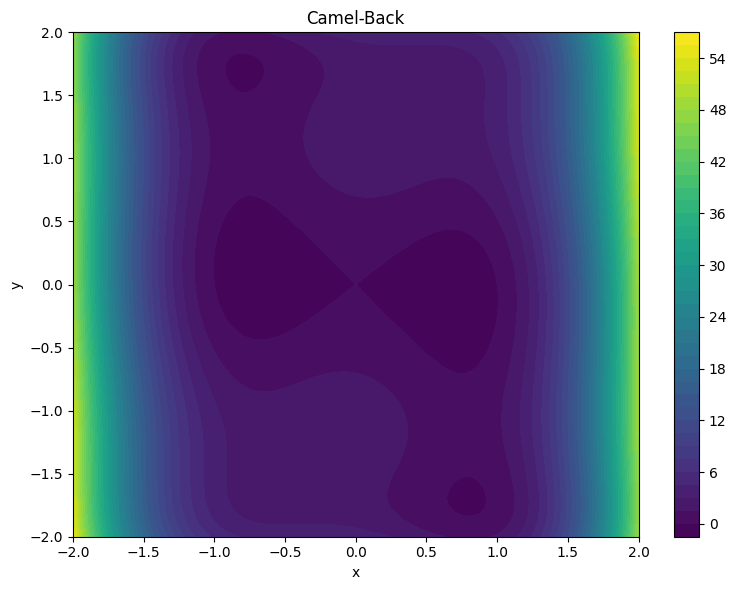

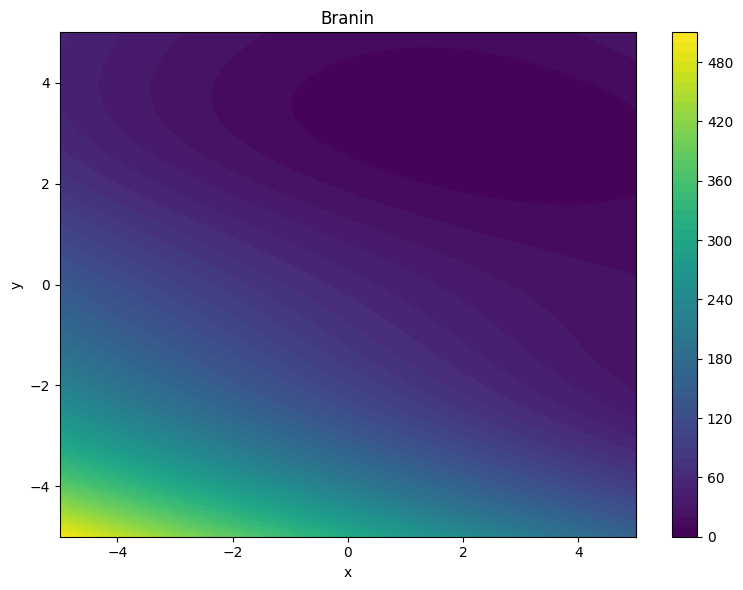

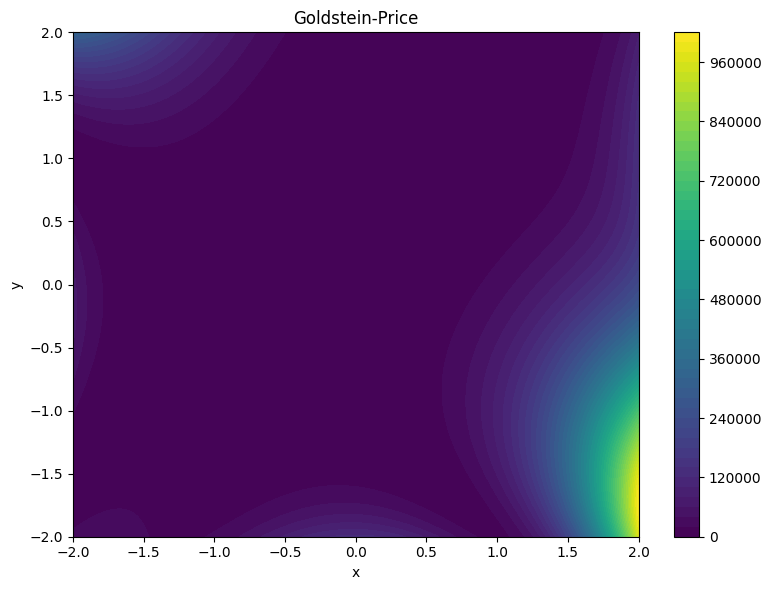

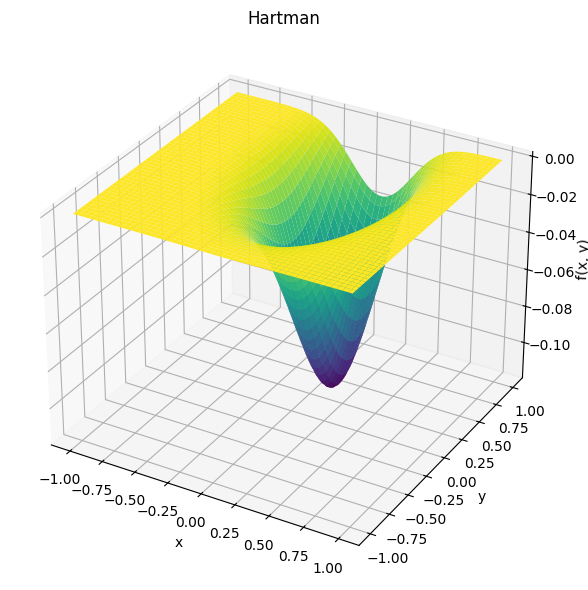

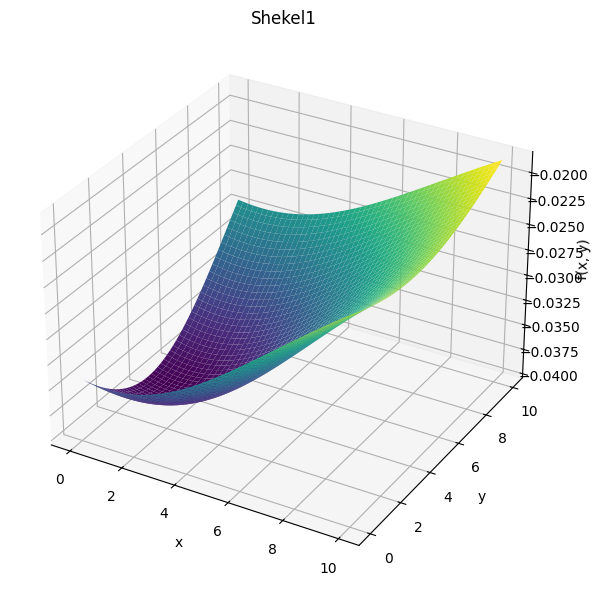

In [8]:
for name, (func, bounds, mode) in FUNCTIONS.items():
    x = np.linspace(bounds[0], bounds[1], 200)
    y = np.linspace(bounds[0], bounds[1], 200)
    X, Y = np.meshgrid(x, y)

    # Check if the function is 'Hartman', 'Shekel1' or 'Kowalik' and adjust input accordingly
    if name in ['Hartman', 'Shekel1', 'Kowalik']:
        # These functions need more than 2 input dimensions, setting the remaining to 0 for visualization
        if name == 'Hartman':
            Z = np.array([[func(np.array([xi, yi, 0])) for yi in y] for xi in x])  # Pad with one 0
        elif name == 'Shekel1':
            Z = np.array([[func(np.array([xi, yi, 0, 0])) for yi in y] for xi in x])  # Pad with two 0s
        elif name == 'Kowalik':
            Z = np.array([[func(np.array([xi, yi, 0, 0])) for yi in y] for xi in x])  # Pad with two 0s for Kowalik
    else:
        Z = np.array([[func(np.array([xi, yi])) for yi in y] for xi in x])

    fig = plt.figure(figsize=(8, 6))
    if mode == '3D':
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
        ax.set_zlabel('f(x, y)')
    else:
        ax = fig.add_subplot(111)
        cp = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
        fig.colorbar(cp)

    ax.set_title(name)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.tight_layout()
    plt.show()